# Klassifikation af Irisblomsten

## STEP 1: Indlæs og inspicér dataen

In [1]:
import pandas as pd
url = "~/Downloads/iris.csv"
col_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'flower']
iris = pd.read_csv(url, names=col_names)

In [2]:
iris.shape

(150, 5)

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


målt i cm

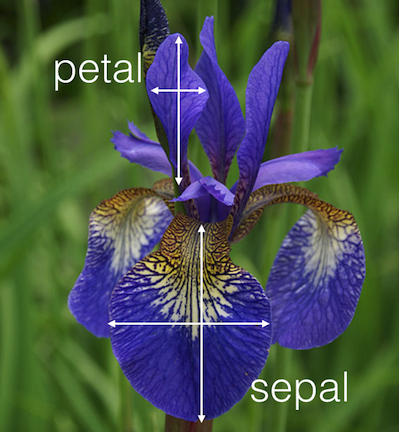

In [4]:
from IPython.display import Image
Image(filename='/Users/kasperschnack/Downloads/iris_petal_sepal_1.png')

In [5]:
iris['flower'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: flower, dtype: int64

In [6]:
import seaborn as sns
# inline plotting
%matplotlib inline

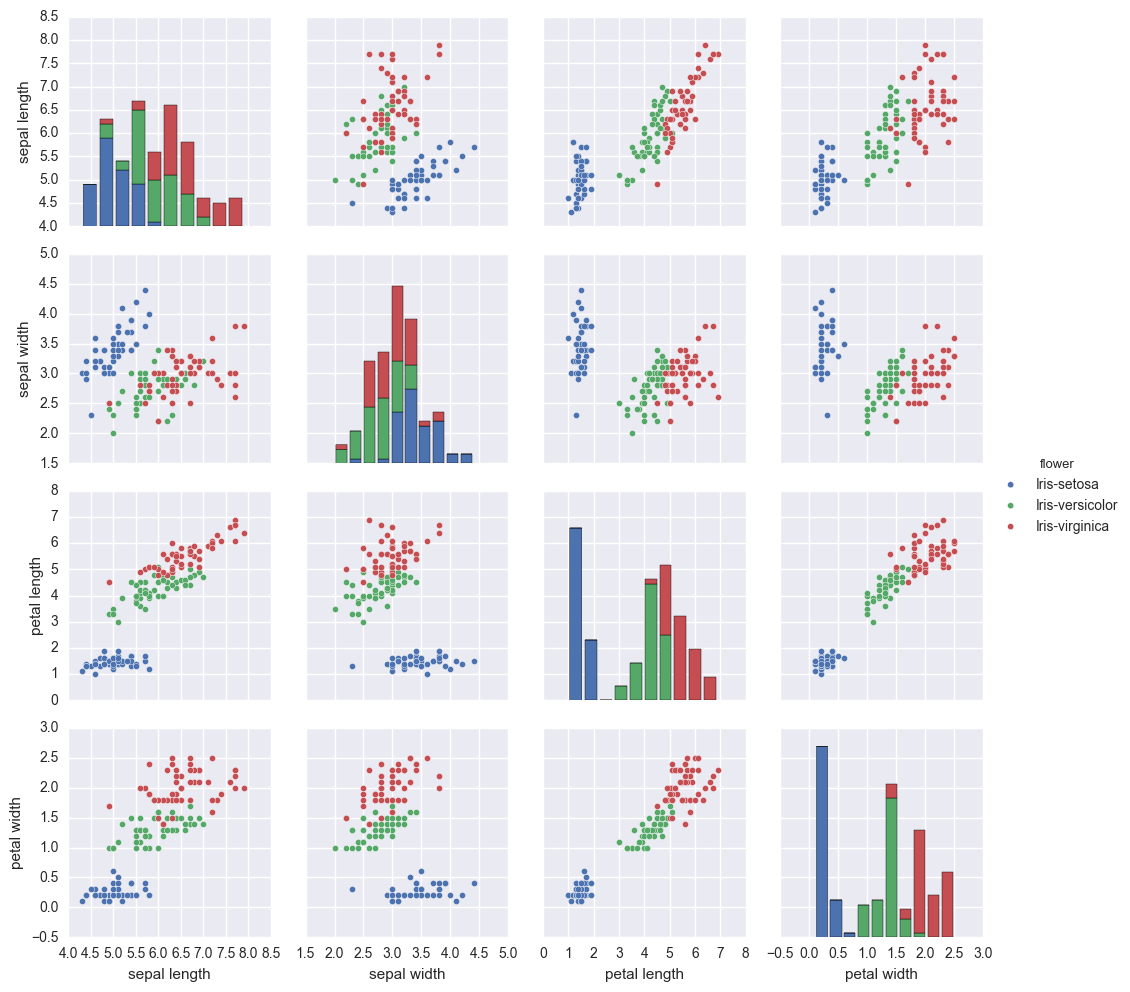

In [7]:
sns.pairplot(iris, hue='flower')

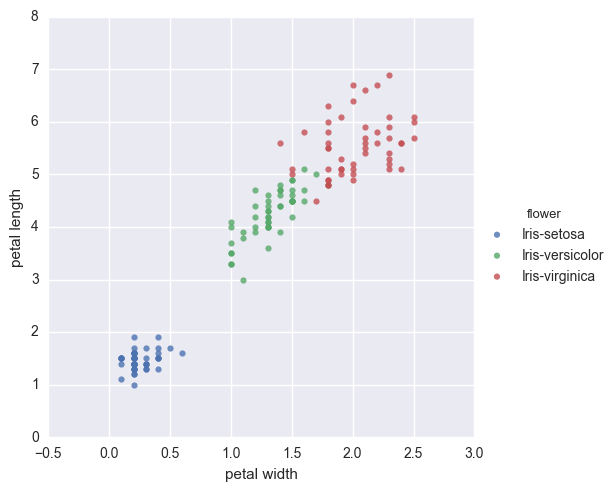

In [8]:
sns.lmplot('petal width', 'petal length', data = iris, fit_reg=False, hue='flower')

## STEP 2: Preprocesser dataen

75% til træning og 25% til test

In [9]:
iris.head()

,sepal length,sepal width,petal length,petal width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
feature_cols = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = iris[feature_cols]
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
flower_map = {k:i for i, k in enumerate(target_names)}
iris['flower'] = iris['flower'].map(flower_map)
y = iris.flower

In [11]:
iris.head()

,sepal length,sepal width,petal length,petal width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

## STEP 3: Modellen 'fittes' med dataen

2 forskellige algoritmer: KNN-classifier og Decision Tree Classifier

In [13]:
# træn en KNN-classifier med n=1 på træningssættet
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
# træn en KNN-classifier med n=30 på træningssættet
knn30 = KNeighborsClassifier(n_neighbors=30)
knn30.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [15]:
# træn en Decision Tree-classifier på træningssættet
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

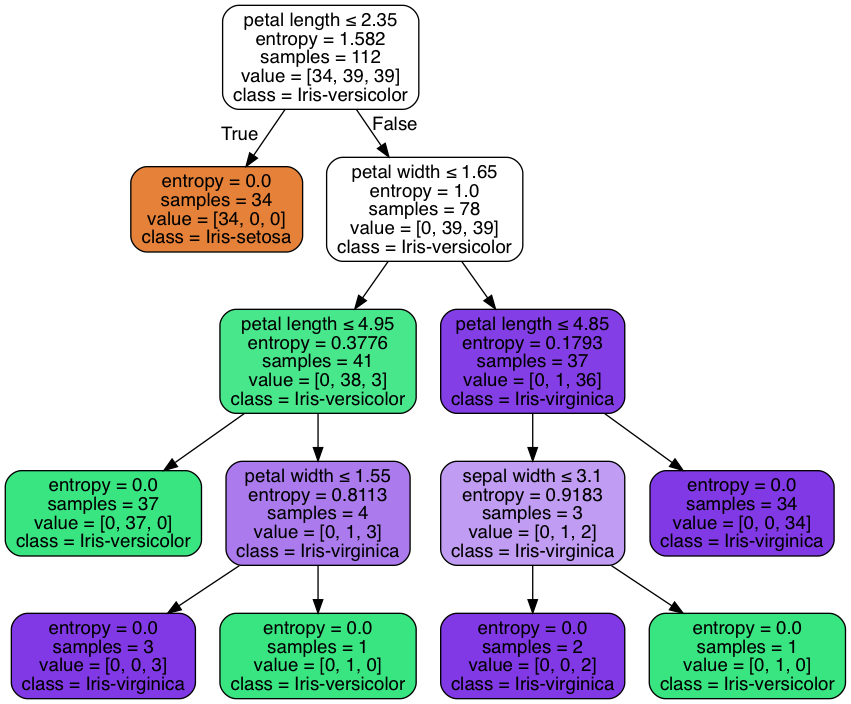

In [16]:
import pydotplus
dot_data = tree.export_graphviz(dt_clf, out_file="iris.dot",
                         class_names=target_names,
                         feature_names=feature_cols,    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris.dot")
Image(graph.create_png())

## Classification accuracy: percentage of correct predictions

In [17]:
knn1_y_pred_class = knn1.predict(X_test)

In [18]:
knn30_y_pred_class = knn30.predict(X_test)

In [19]:
dt_clf_y_pred_class = dt_clf.predict(X_test)

In [20]:
# calculate accuracy
from sklearn import metrics
print("knn n=1: ", metrics.accuracy_score(y_test, knn1_y_pred_class))
print("knn n=30: ", metrics.accuracy_score(y_test, knn30_y_pred_class))
print("Decision Tree Classifier: ", metrics.accuracy_score(y_test, dt_clf_y_pred_class))

knn n=1:  1.0
knn n=30:  0.921052631579
Decision Tree Classifier:  0.947368421053


In [21]:
print(metrics.confusion_matrix(y_test, knn1_y_pred_class))
print(metrics.confusion_matrix(y_test, knn30_y_pred_class))
print(metrics.confusion_matrix(y_test, dt_clf_y_pred_class))

[[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]
[[16  0  0]
 [ 0 10  1]
 [ 0  2  9]]
[[16  0  0]
 [ 0 10  1]
 [ 0  1 10]]


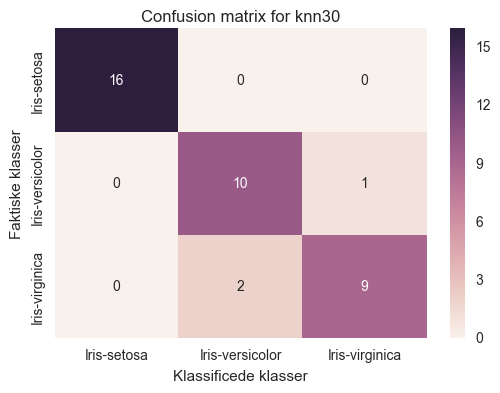

In [22]:
import matplotlib.pyplot as plt
knn30_cm = metrics.confusion_matrix(y_test, knn30_y_pred_class)
df_cm = pd.DataFrame(knn30_cm, index =  target_names,
                  columns = target_names)

ax = plt.axes()
sns.heatmap(df_cm, annot=True, ax = ax)

ax.set_title('Confusion matrix for knn30')
ax.set_xlabel('Klassificede klasser')
ax.set_ylabel('Faktiske klasser')
plt.show()

In [23]:
knn1.predict_proba(X_test)

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.]])

In [24]:
knn30.predict_proba(X_test)

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.4       ,  0.6       ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.13333333,  0.86666667],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.13333333,  0.86666667],
       [ 0.        ,  0.06666667,  0.93333333],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.73333333,  0.26666667],
       [ 0.        ,  0.7       ,  0.3       ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.93333333,  0.06666667],
       [ 0.        ,  0.03333333,  0.96666667],
       [ 0.        ,  0.9       ,  0.1       ],
       [ 0.        ,  0.46666667,  0.533

In [25]:
dt_clf.predict_proba(X_test)

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.]])